In [49]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [50]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/World%20Happiness/happiness_score_dataset.csv")
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [51]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [52]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [ ]:
df.drop(columns = ['Country', 'Region', 'Standard Error'], inplace = True,)

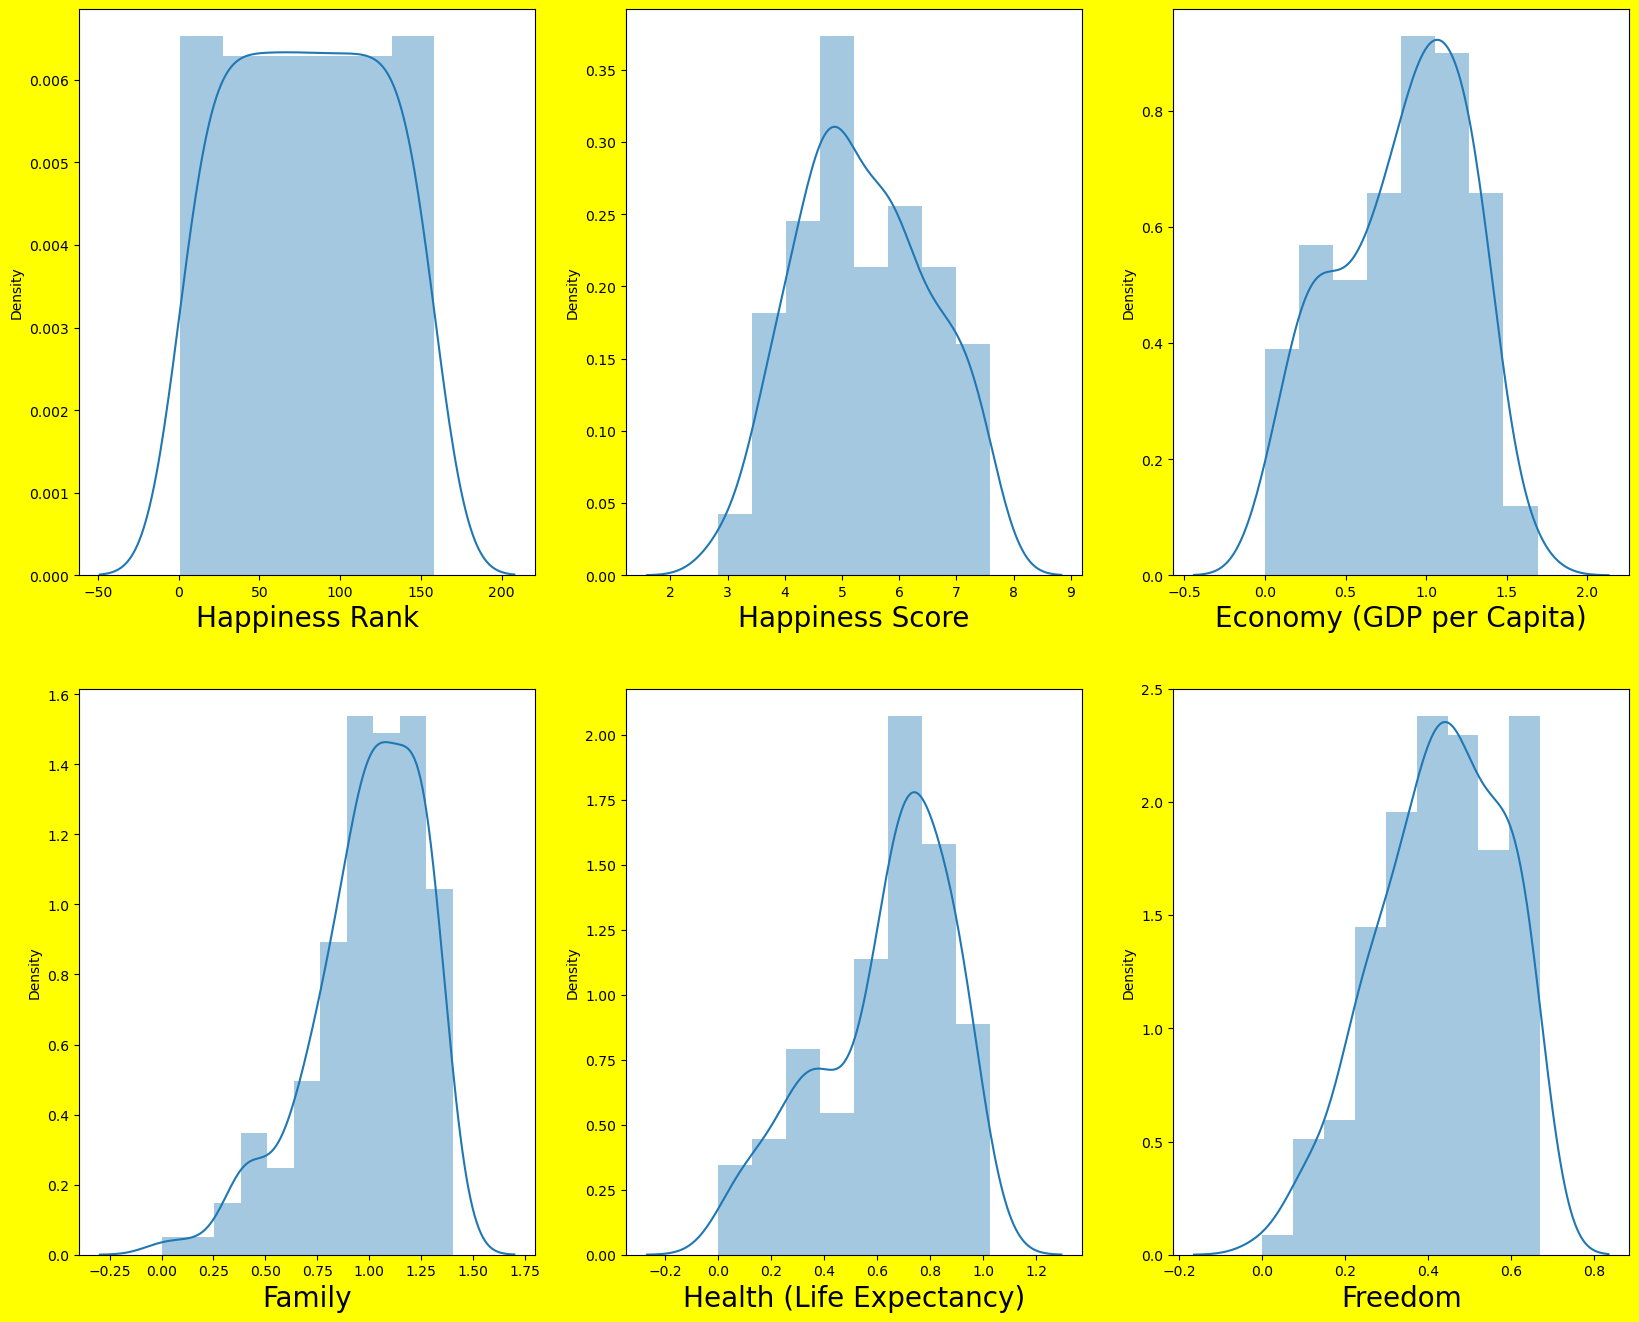

In [91]:
# Let's see how data is distributed for every column

plt.figure(figsize = (20, 25), facecolor = 'yellow')
plotnumber = 1

for column in df:
    if plotnumber <= 6: # as there are 9 column in the data
        ax = plt.subplot(3,3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 20)
    
    plotnumber += 1
plt.show()

In [55]:
## Select features and label
x = df.drop(columns = ["Happiness Score"])
y = df['Happiness Score']

In [56]:
# Split into train test data set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 41)

In [57]:
# Using Linear Regression
linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [58]:
y_pred = linear_reg.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [59]:
print(f"Linear Regression - MSE: {mse}, R2: {r2}")

Linear Regression - MSE: 9.573974645108587e-08, R2: 0.99999993425312


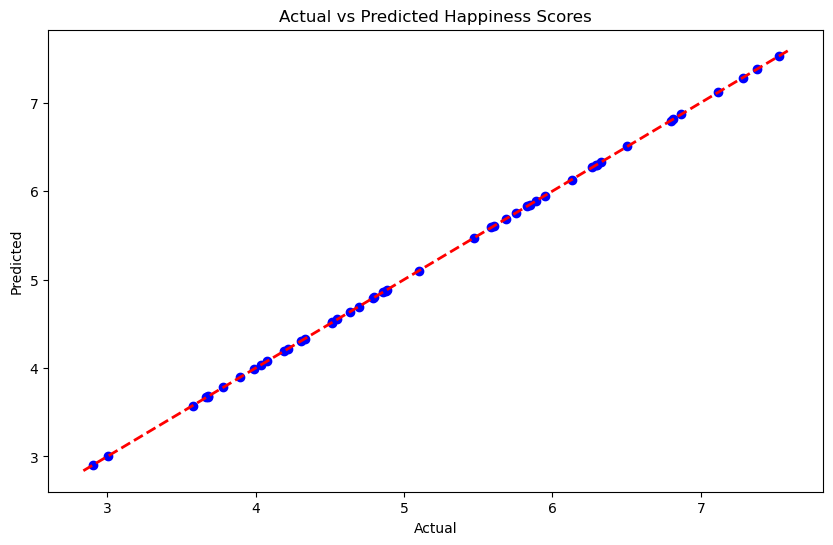

In [85]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Happiness Scores')
plt.show()

In [88]:
# Step 6: Make Predictions
new_data_point = np.array([1.2, 1.1, 0.8, 0.5, 0.1, 0.05, 0.0, 1.0])
predicted_happiness = linear_reg.predict(new_data_point.reshape(1, -1))

In [89]:
predicted_happiness[0]

3.580005405679511